In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import heapq
import os
import time
import math

In [44]:
dataset = 'yelp2018'
algorithm = 'kgat'

In [45]:
ds_path = os.path.join(os.getcwd(), f'Data/{dataset}')
embed_path = os.path.join(os.getcwd(), f'embeds/{dataset}/{algorithm}')
plot_path = os.path.join(os.getcwd(), f'plots/{dataset}')
scores_path = os.path.join(os.getcwd(), f'scores/{dataset}/{algorithm}')
results_path = os.path.join(os.getcwd(), f'results/{dataset}/{algorithm}')
print("Dataset path:", ds_path)
print("Embed path:", embed_path)
print("Plots path:", plot_path)
print("Score path:", scores_path)
print("Results path:", results_path)

Dataset path: /Users/johnhannebery/gitrepos/recsys/Data/yelp2018
Embed path: /Users/johnhannebery/gitrepos/recsys/embeds/yelp2018/kgat
Plots path: /Users/johnhannebery/gitrepos/recsys/plots/yelp2018
Score path: /Users/johnhannebery/gitrepos/recsys/scores/yelp2018/kgat
Results path: /Users/johnhannebery/gitrepos/recsys/results/yelp2018/kgat


In [46]:
user_results_list = []
item_results_list = []
for algorithm in ['als', 'gcn', 'kgat']:
        all_placeholder = pd.read_csv(os.path.join(results_path.
                                                   replace('kgat', algorithm),'results_all.csv'),
                                      index_col='Unnamed: 0')
        all_placeholder['group'] = 'all'
        all_placeholder['algorithm'] = algorithm
        
        low_user_placeholder = pd.read_csv(os.path.join(results_path.
                                                   replace('kgat', algorithm),'results_low_user.csv'),
                                      index_col='Unnamed: 0')
        low_user_placeholder['group'] = 'low'
        low_user_placeholder['algorithm'] = algorithm
        
        low_item_placeholder = pd.read_csv(os.path.join(results_path.
                                                   replace('kgat', algorithm),'results_low_item.csv'),
                                      index_col='Unnamed: 0')
        low_item_placeholder['group'] = 'low'
        low_item_placeholder['algorithm'] = algorithm
        
        high_user_placeholder = pd.read_csv(os.path.join(results_path.
                                                   replace('kgat', algorithm),'results_high_user.csv'),
                                      index_col='Unnamed: 0')
        high_user_placeholder['group'] = 'high'
        high_user_placeholder['algorithm'] = algorithm
        
        high_item_placeholder = pd.read_csv(os.path.join(results_path.
                                                   replace('kgat', algorithm),'results_high_item.csv'),
                                      index_col='Unnamed: 0')
        high_item_placeholder['group'] = 'low'
        high_item_placeholder['algorithm'] = algorithm
        
        user_results_list.append(all_placeholder)
        user_results_list.append(low_user_placeholder)
        user_results_list.append(high_user_placeholder)
        
        item_results_list.append(all_placeholder)
        item_results_list.append(low_item_placeholder)
        item_results_list.append(high_item_placeholder)
        
        
user_results = pd.concat(user_results_list)
item_results  = pd.concat(item_results_list)

In [47]:
user_results

,precision,recall,ndcg,hit_ratio,F1,diversity,novelty,coverage,K,group,algorithm
0,0.014613,0.003268,0.014613,0.014613,0.005082,1.000000,6.779742,0.002416,1,all,als
1,0.014099,0.015104,0.036335,0.066815,0.013232,0.467036,7.101662,0.006456,5,all,als
2,0.012749,0.027112,0.052046,0.114334,0.015718,0.479829,7.289586,0.011243,10,all,als
3,0.011437,0.047460,0.073926,0.188401,0.016931,0.477549,7.517375,0.017919,20,all,als
0,0.011887,0.003501,0.011887,0.011887,0.005308,1.000000,6.773122,0.002372,1,low,als
1,0.011063,0.015964,0.029981,0.052930,0.012750,0.469492,7.093770,0.006412,5,low,als
2,0.009828,0.028484,0.042396,0.090734,0.014331,0.481682,7.281306,0.011243,10,low,als
3,0.008609,0.049422,0.059322,0.151589,0.014469,0.479329,7.509128,0.017853,20,low,als
0,0.026497,0.002253,0.026497,0.026497,0.004095,1.000000,6.808602,0.002130,1,high,als
1,0.027337,0.011356,0.064036,0.127349,0.015333,0.456328,7.136069,0.005907,5,high,als


In [48]:
def get_fair_metrics(stats_df):
    li=[]
    for K in stats_df['K'].unique().tolist():
        for metric in stats_df.columns.drop(['K','group','algorithm']).tolist():
            for algorithm in stats_df['algorithm'].unique().tolist():
                low = stats_df[(stats_df['group']=='low') & (stats_df['K']==K)
                              & (stats_df['algorithm']==algorithm)][metric].iloc[0]
                high = stats_df[(stats_df['group']=='high') & (stats_df['K']==K) 
                               & (stats_df['algorithm']==algorithm)][metric].iloc[0]
                fairness_score = np.round((high-low)/low, 3)
                li.append([metric, K, fairness_score, algorithm])
                fairdf = pd.DataFrame(li,columns=['metric','K','fairness','algorithm'])
            
    return fairdf

In [49]:
fair_df = get_fair_metrics(user_results)

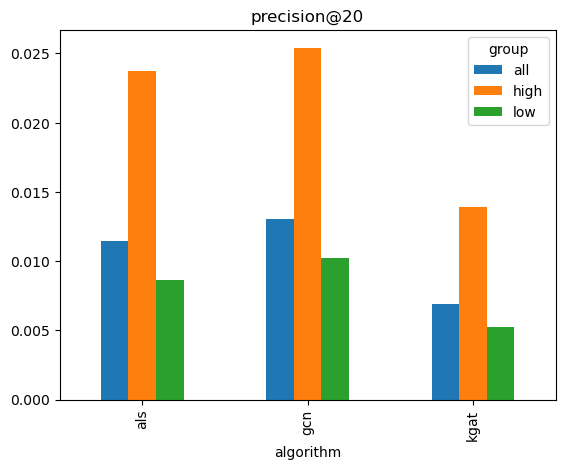

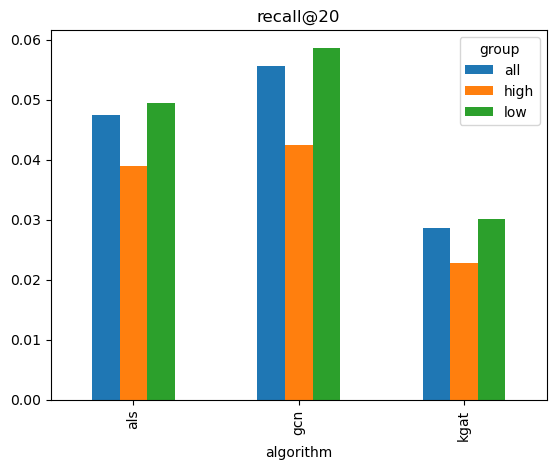

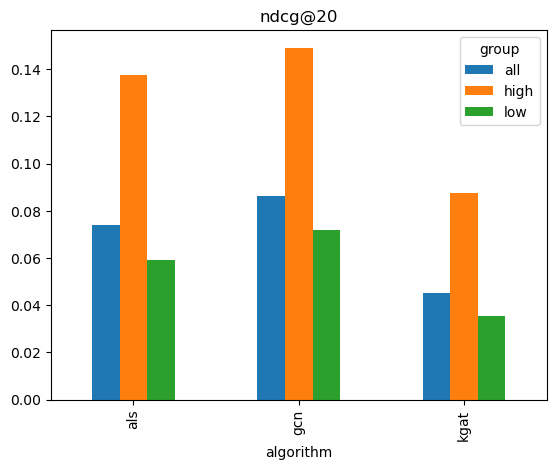

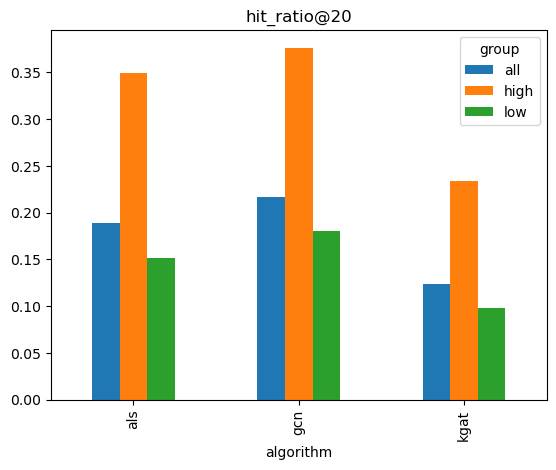

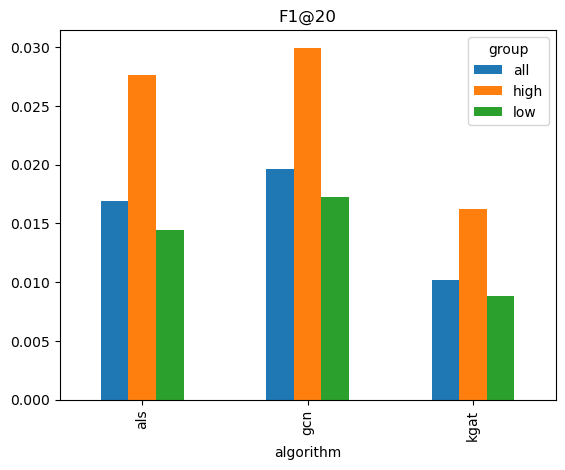

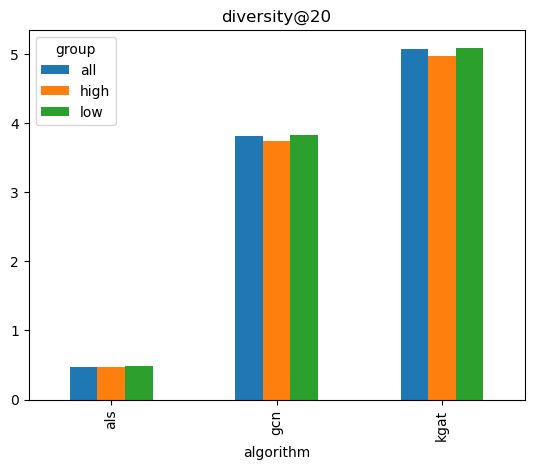

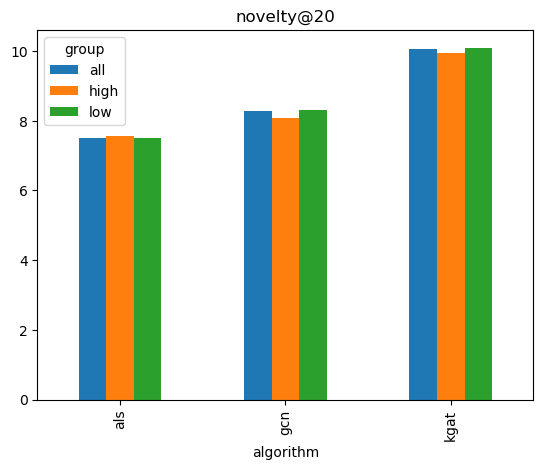

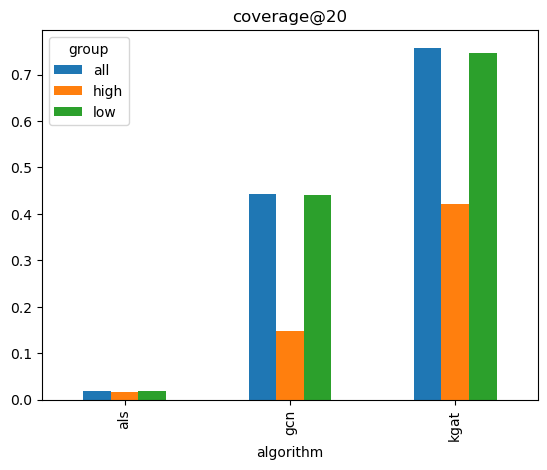

In [50]:
for metric in user_results.columns.drop(['K','group','algorithm']).tolist():
    user_results[user_results['K']==20].pivot(index='algorithm', columns='group', values=metric).plot(kind='bar')
    plt.title(f'{metric}@20')
    #plt.savefig(f'{metric}HR@20')

In [51]:
fair_df

,metric,K,fairness,algorithm
0,precision,1,1.229,als
1,precision,1,0.970,gcn
2,precision,1,1.616,kgat
3,recall,1,-0.356,als
4,recall,1,-0.436,gcn
...,...,...,...,...
91,novelty,20,-0.030,gcn
92,novelty,20,-0.017,kgat
93,coverage,20,-0.043,als
94,coverage,20,-0.666,gcn


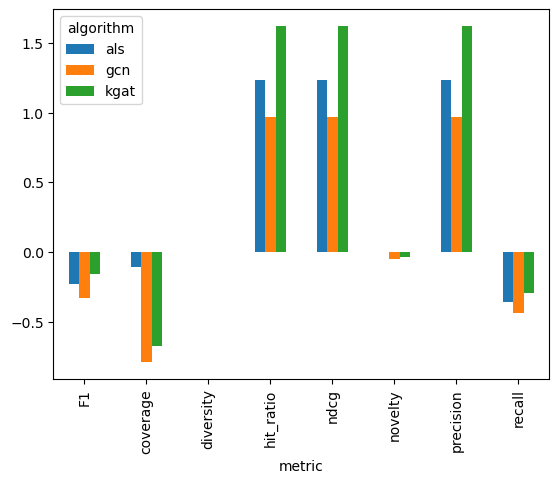

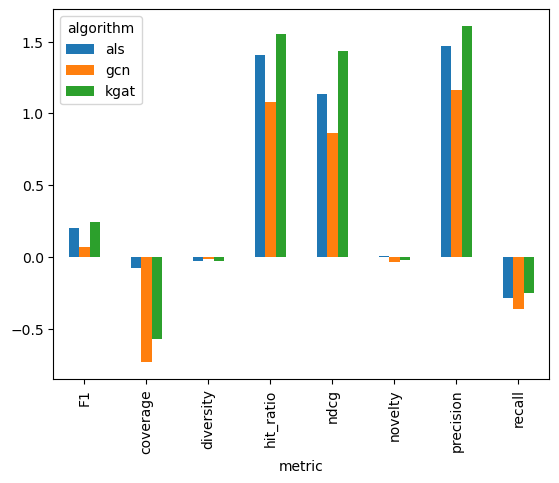

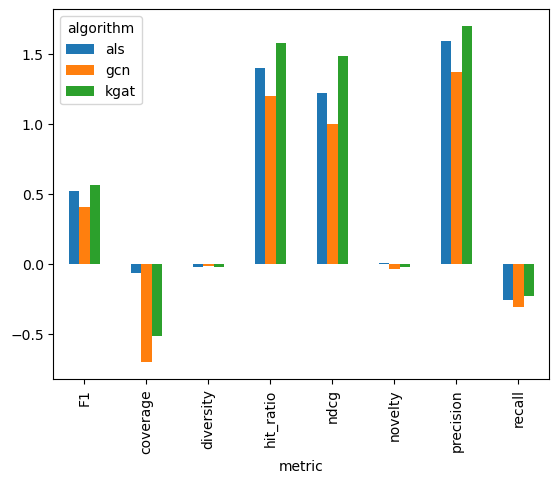

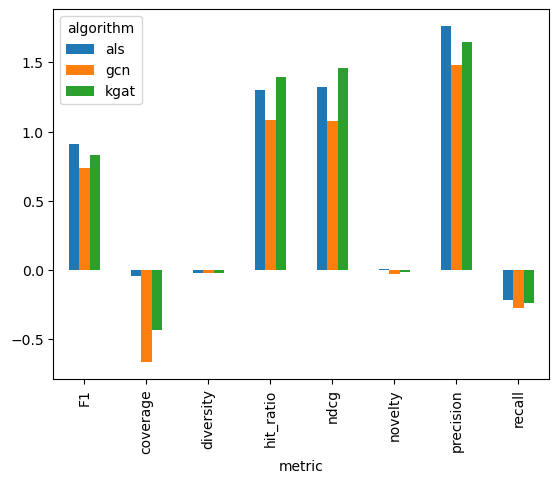

In [52]:
for K in fair_df['K'].unique().tolist():
    fair_df[fair_df['K']==K].pivot(index='metric', columns='algorithm', values='fairness').plot(kind='bar')